In [75]:
from io import StringIO
import base64

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import ssl

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

nltk.download('wordnet')

from nltk import sent_tokenize
from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import torch
from transformers import BertTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

onedrive_link=create_onedrive_directdownload("https://1drv.ms/x/s!AoiE7xOoBAsngsd-PpntYUKRt9nOQg?e=YO5X5h")
print(onedrive_link)

https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3gvcyFBb2lFN3hPb0JBc25nc2QtUHBudFlVS1J0OW5PUWc_ZT1ZTzVYNWg/root/content


In [77]:
df=pd.read_excel(onedrive_link)
df.head()

,column_a,message_id,date,from,to,subject,x_from,x_to,x_cc,x_bcc,...,Unnamed: 1680,Unnamed: 1681,Unnamed: 1682,Unnamed: 1683,Unnamed: 1684,Unnamed: 1685,Unnamed: 1686,Unnamed: 1687,Unnamed: 1688,Unnamed: 1689
0,379,<9831685.1075855725804.JavaMail.evans@thyme>,2001-03-15T14:45:00,frozenset({'phillip.allen@enron.com'}),frozenset({'todd.burke@enron.com'}),Re: Confidential Employee Information/Lenhart,Phillip K Allen,Todd Burke,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,381,<21041312.1075855725847.JavaMail.evans@thyme>,2001-03-15T14:11:00,frozenset({'phillip.allen@enron.com'}),frozenset({'kim.bolton@enron.com'}),RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...,Phillip K Allen,Kim Bolton,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2139,<5907100.1075858639941.JavaMail.evans@thyme>,2001-06-20T17:04:51,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2140,<26625142.1075858639964.JavaMail.evans@thyme>,2001-06-20T17:09:00,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2232,<19730598.1075858642129.JavaMail.evans@thyme>,2001-08-09T12:30:58,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'm..tholt@e...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Smith, Matt </O=ENRON/OU=NA/CN=RECIPIENTS/CN=M...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.columns

Index(['column_a', 'message_id', 'date', 'from', 'to', 'subject', 'x_from',
       'x_to', 'x_cc', 'x_bcc',
       ...
       'Unnamed: 1680', 'Unnamed: 1681', 'Unnamed: 1682', 'Unnamed: 1683',
       'Unnamed: 1684', 'Unnamed: 1685', 'Unnamed: 1686', 'Unnamed: 1687',
       'Unnamed: 1688', 'Unnamed: 1689'],
      dtype='object', length=1690)

In [79]:
df=df[~df['content'].isna()]
df=df[df['labeled']==True]
col=['message_id','subject','content','cat_1_level_2']
df=df.loc[:,col]
df.head()

,message_id,subject,content,cat_1_level_2
0,<9831685.1075855725804.JavaMail.evans@thyme>,Re: Confidential Employee Information/Lenhart,I also need to know the base salaries of Jay R...,1
1,<21041312.1075855725847.JavaMail.evans@thyme>,RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...,Thanks for the information. It would be helpfu...,3
2,<5907100.1075858639941.JavaMail.evans@thyme>,FW: Western Wholesale Activities - Gas & Power...,"-----Original Message----- From: Hawkins, Bern...",4
3,<26625142.1075858639964.JavaMail.evans@thyme>,FW: Western Wholesale Activities - Gas & Power...,"-----Original Message----- From: Perrino, Dave...",4
4,<19730598.1075858642129.JavaMail.evans@thyme>,FW: Western Wholesale Activities - Gas & Power...,"-----Original Message----- From: Comnes, Alan ...",4


In [80]:
df['content']=df['content'].replace({'\n':' ','\t':' '},regex=True)
df['content']=df['content'].replace({',':'',},regex=True)
df['content']=df['content'].replace({';':'',},regex=True)

df['content']=df['content'].replace({'"':'',},regex=True)
df['content']=df['content'].replace({'"':''},regex=True)

df['subject']=df['subject'].replace({"'":""},regex=True)
df['subject']=df['subject'].replace({"'":""},regex=True)

df=df.loc[(~df['subject'].str.startswith('FW:',na=False))  ,:]
df.loc[(~df['subject'].str.startswith('FW:',na=False))  ,:]

df.loc[df['content'].str.contains('-----Original Message-----'),'content']=df.loc[df['content'].str.contains('-----Original Message-----'),'content'].str.extract(r'([\s\S]*?)'+r'-----Original Message-----',expand=False)
df.loc[df['content'].str.contains('----- Forwarded by'),'content']=df.loc[df['content'].str.contains('----- Forwarded by'),'content'].str.extract(r'([\s\S]*?)'+r'----- Forwarded by',expand=False)
df.loc[df['content'].str.contains('---------------------- Forwarded by'),'content']=df.loc[df['content'].str.contains('---------------------- Forwarded by'),'content'].str.extract(r'([\s\S]*?)'+r'---------------------- Forwarded by',expand=False)
df.loc[df['content'].str.contains('-------------------------- Sent from my BlackBerry'),'content']=df.loc[df['content'].str.contains('-------------------------- Sent from my BlackBerry'),'content'].str.extract(r'([\s\S]*?)'+r'-------------------------- Sent from my BlackBerry',expand=False)

# remove all the numbers
df['content']=df['content'].replace({r'\d+':''},regex=True)

# remove email ids
df['content']=df['content'].replace({r'\S*@\S*\s?':''},regex=True)

'''
# remove everything after To: From: Re: Subject: etc..
df['content']=df['content'].replace({r'To:.+':'',r'From:.+':'',r'Re:.+':'',r'Subject:.+':'',r'Date:.+':''},regex=True)
'''

# remove just To: From: Re: Subject: etc.. texts
df['content']=df['content'].replace({r'To:':'',r'From:':'',r'Re:':'',r'Subject:':'',r'Date:':''},regex=True)




df.to_csv('enron_removed.csv', index=False)
df

,message_id,subject,content,cat_1_level_2
0,<9831685.1075855725804.JavaMail.evans@thyme>,Re: Confidential Employee Information/Lenhart,I also need to know the base salaries of Jay R...,1
1,<21041312.1075855725847.JavaMail.evans@thyme>,RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...,Thanks for the information. It would be helpfu...,3
5,<21261996.1075858638025.JavaMail.evans@thyme>,Re: Western Wholesale Activities - Gas & Power...,Can you guys coordinate to make sure someone l...,4
6,<20399547.1075857614321.JavaMail.evans@thyme>,Re: confidential employee information-dutch qu...,thx Jeanie Slone // : PM John cc: confidenti...,5
7,<860767.1075849626951.JavaMail.evans@thyme>,Re: HP -- confidential internal document,This is an excellent update. Thanks for puttin...,1
...,...,...,...,...
1767,<18361957.1075861368310.JavaMail.evans@thyme>,Confidential Due Diligence Info - GS,There is a lot of confidential information her...,1
1768,<29049822.1075842045435.JavaMail.evans@thyme>,Californias dim bulbs,You may have seen this when it first came out ...,1
1769,<205897.1075861997314.JavaMail.evans@thyme>,RE: confidential ee info,Mark Can you email me or fax me any written do...,5
1770,<23743848.1075863311776.JavaMail.evans@thyme>,Confidential Information and Securities Trading,WILLIAMS WILLIAM - -- Enron Wholesale Services...,1


In [81]:
'''
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
'''

'\nimport spacy\nfrom spacy import displacy\nfrom collections import Counter\nimport en_core_web_sm\nnlp = en_core_web_sm.load()\n'

In [82]:
'''
doc = nlp(‘European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices’)
pprint([(X.text, X.label_) for X in doc.ents])
'''

'\ndoc = nlp(‘European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices’)\npprint([(X.text, X.label_) for X in doc.ents])\n'

In [83]:
df['message_id']=df['message_id'].astype(str)
df['subject']=df['subject'].astype(str)
df['content']=df['content'].astype(str)

# to lower type
df['content']=df['content'].str.lower()
df['subject']=df['subject'].str.lower()

# remove punctuations
df['content'] = df['content'].str.replace('[^\w\s]','')
df['subject'] = df['subject'].str.replace('[^\w\s]','')

'''
# remove combination of words and digits
df['content'] = df['content'].str.replace('W*dw*','')
df['subject'] = df['subject'].str.replace('W*dw*','')
'''

# tokenization
df["content"] = df["content"].apply(lambda x: nltk.word_tokenize(x))
df["subject"] = df["subject"].apply(lambda x: nltk.word_tokenize(x))

'''
# porter stemming
ps = PorterStemmer()
df["content"] = df["content"].apply(lambda x: [ps.stem(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [ps.stem(i) for i in x])
'''
# snowball stemming
ss = SnowballStemmer(language = "english")
df["content"] = df["content"].apply(lambda x: [ss.stem(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [ss.stem(i) for i in x])

# lemmantization
lemmatizer = WordNetLemmatizer()
df["content"] = df["content"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df["subject"] = df["subject"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

# join text back
def join_words(text):
    return " ".join(text)
df["subject"] = df["subject"].apply(lambda x: join_words(x))
df["content"] = df["content"].apply(lambda x: join_words(x))

df

C:\Users\hp\AppData\Local\Temp\ipykernel_15776\3338060655.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')
C:\Users\hp\AppData\Local\Temp\ipykernel_15776\3338060655.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['subject'] = df['subject'].str.replace('[^\w\s]','')


,message_id,subject,content,cat_1_level_2
0,<9831685.1075855725804.JavaMail.evans@thyme>,re confidenti employe informationlenhart,i also need to know the base salari of jay rei...,1
1,<21041312.1075855725847.JavaMail.evans@thyme>,re person and confidenti compens inform,thank for the inform it would be help if you w...,3
5,<21261996.1075858638025.JavaMail.evans@thyme>,re western wholesal activ gas power conf call ...,can you guy coordin to make sure someon listen...,4
6,<20399547.1075857614321.JavaMail.evans@thyme>,re confidenti employe informationdutch quigley,thx jeani slone pm john cc confidenti employe ...,5
7,<860767.1075849626951.JavaMail.evans@thyme>,re hp confidenti intern document,this is an excel updat thank for put this toge...,1
...,...,...,...,...
1767,<18361957.1075861368310.JavaMail.evans@thyme>,confidenti due dilig info g,there is a lot of confidenti inform here in it...,1
1768,<29049822.1075842045435.JavaMail.evans@thyme>,california dim bulb,you may have seen this when it first came out ...,1
1769,<205897.1075861997314.JavaMail.evans@thyme>,re confidenti ee info,mark can you email me or fax me ani written do...,5
1770,<23743848.1075863311776.JavaMail.evans@thyme>,confidenti inform and secur trade,william william enron wholesal servic offic of...,1


In [84]:
df_content=df['content']
df_message_id=df['message_id']
df_subject=df['subject']
df_label=df['cat_1_level_2'].astype('int')

In [85]:
df.to_csv('BERT_data.csv', index=False)

<Axes: >

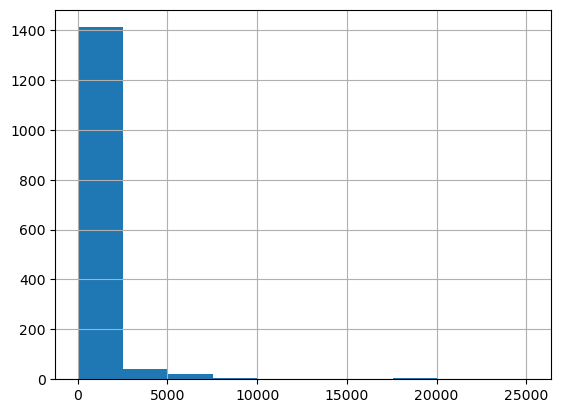

In [86]:
# character length
df['content'].str.len().hist()

<Axes: >

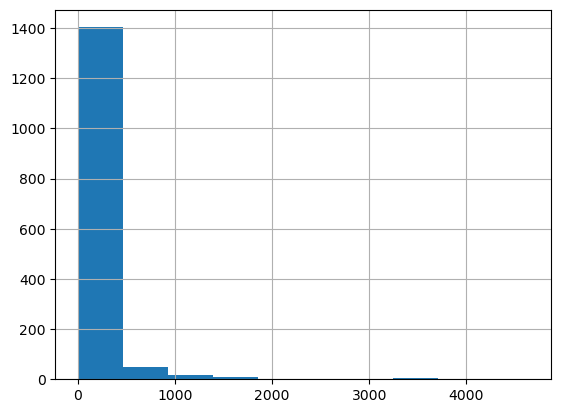

In [87]:
# total word length
def sentence_len(sentence):
    return len(sentence.split())

df['content'].apply(lambda x: sentence_len(x)).hist()

C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Axes: >

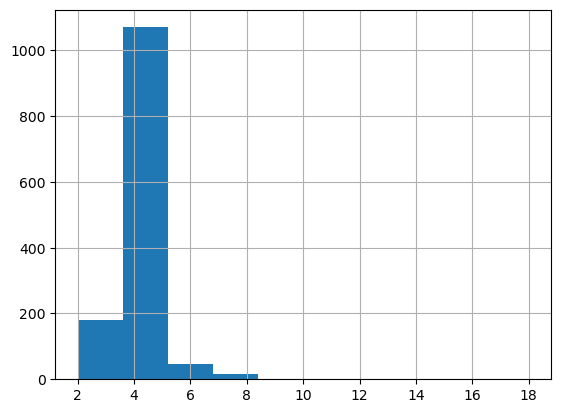

In [88]:
# average word length
df['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

1.	CC	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun
19.	PRP$	Possessive pronoun
20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun
35.	WP$$	Possessive wh-pronoun
36.	WRB	Wh-adverb

In [89]:
# word count
new= df['content'].str.split()
new=df['content'].values.tolist()
corpus=[word for i in new for word in i.split()]
wo_li={}
for wo in corpus: 
    wo_li[wo] = wo_li.get(wo, 0) + 1    

In [90]:
wo_li = dict(sorted(wo_li.items(), key=lambda item: item[1], reverse=True))
wo_li

pos_tags = pos_tag(wo_li.keys())
pos_tags

[('the', 'DT'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('on', 'IN'),
 ('i', 'NN'),
 ('for', 'IN'),
 ('it', 'PRP'),
 ('this', 'DT'),
 ('be', 'VB'),
 ('with', 'IN'),
 ('we', 'PRP'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('are', 'VBP'),
 ('will', 'MD'),
 ('at', 'IN'),
 ('not', 'RB'),
 ('by', 'IN'),
 ('would', 'MD'),
 ('from', 'IN'),
 ('if', 'IN'),
 ('market', 'NN'),
 ('or', 'CC'),
 ('power', 'NN'),
 ('price', 'NN'),
 ('enron', 'NN'),
 ('california', 'NN'),
 ('wa', 'NN'),
 ('but', 'CC'),
 ('he', 'PRP'),
 ('an', 'DT'),
 ('ha', 'NN'),
 ('your', 'PRP$'),
 ('our', 'PRP$'),
 ('they', 'PRP'),
 ('said', 'VBD'),
 ('energi', 'NN'),
 ('about', 'IN'),
 ('do', 'VBP'),
 ('meet', 'VB'),
 ('time', 'NN'),
 ('state', 'NN'),
 ('me', 'PRP'),
 ('electr', 'IN'),
 ('ferc', 'NN'),
 ('can', 'MD'),
 ('cc', 'VB'),
 ('ani', 'NN'),
 ('there', 'RB'),
 ('which', 'WDT'),
 ('what', 'WP'),
 ('need', 'VBP'),
 ('am', 'VBP'),
 ('like', 'IN'),
 ('plea', 'NN')

Text(0, 0.5, 'Count')

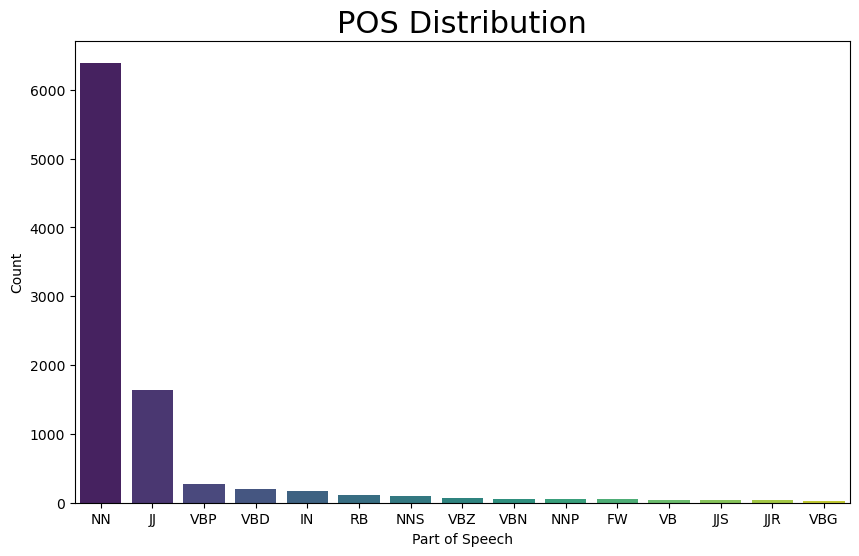

In [91]:
pos_li={}
for x,pos in pos_tags: 
    pos_li[pos] = pos_li.get(pos, 0) + 1 
pos_li = dict(sorted(pos_li.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pos_li.keys())[:15],y=list(pos_li.values())[:15],palette='viridis')
plt.title('POS Distribution',size=22)
plt.xlabel('Part of Speech')
plt.ylabel('Count')

In [92]:
pos_tags[1][1]

'TO'

In [93]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0, 0.5, 'Count')

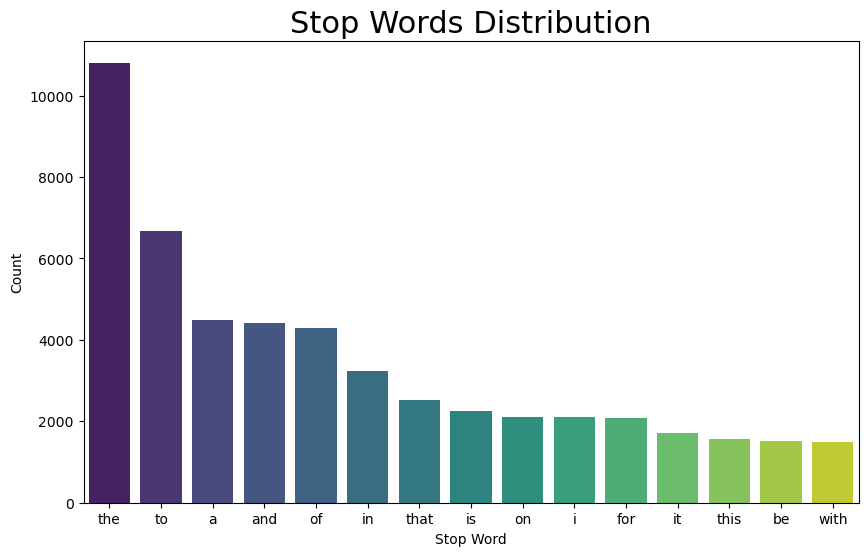

In [94]:
# stop words
stop_wo_li={}
for wo,i in wo_li.items():
    if wo in stop:
        stop_wo_li[wo]=i

plt.figure(figsize=(10, 6))
sns.barplot(x=list(stop_wo_li.keys())[:15],y=list(stop_wo_li.values())[:15],palette='viridis')
plt.title('Stop Words Distribution',size=22)
plt.xlabel('Stop Word')
plt.ylabel('Count')

<BarContainer object of 5 artists>

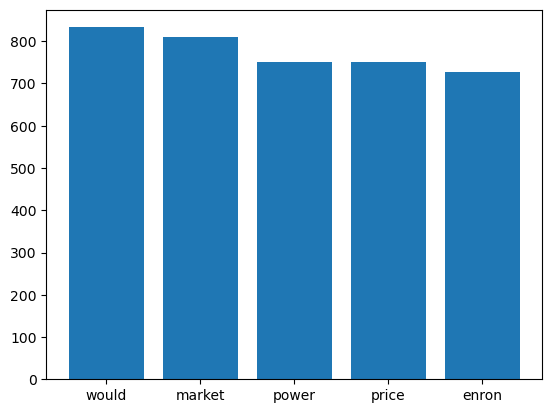

In [95]:
# not stop words
for st_wo in stop:
    if st_wo in wo_li:
        wo_li.pop(st_wo)
wo_li
plt.bar(list(wo_li.keys())[:5],list(wo_li.values())[:5])

In [96]:
# filtering out stop words
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
df['content'] = df['content'].apply(remove_stopwords)

In [97]:
df["content"]

0       also need know base salari jay reitmey moniqu ...
1       thank inform would help would send detail work...
5       guy coordin make sure someon listen confer cal...
6       thx jeani slone pm john cc confidenti employe ...
7       excel updat thank put togeth dalepatrick let r...
                              ...                        
1767    lot confidenti inform item detail month pl cov...
1768                 may seen first came back worth rerun
1769    mark email fax ani written document give heidi...
1770    william william enron wholesal servic offic ch...
1771    love avail beauti lass view thing interest enr...
Name: content, Length: 1490, dtype: object

In [98]:
df.to_csv('BERT_data.csv', index=False)